IMPORTING LIBRARIES

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

IMPORTING DATASET

In [5]:
data = pd.read_csv("indianEco.csv")
data = data.drop(["Unnamed: 0"], axis=1)
data

,Year,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),GCF % of GDP,Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
0,1960,3.702988e+10,82,0.00,17.931335,6.83,4.46,6.745366e+08,1.78,445954579,2.31,41.13
1,1961,3.923244e+10,85,3.72,19.262146,5.96,4.30,6.663571e+08,1.70,456351876,2.33,41.74
2,1962,4.216148e+10,90,2.93,18.107571,6.03,4.17,5.127918e+08,3.63,467024193,2.34,42.34
3,1963,4.842192e+10,101,5.99,18.995457,5.91,4.28,6.078625e+08,2.95,477933619,2.34,42.94
4,1964,5.648029e+10,116,7.45,19.529828,5.69,3.73,4.991451e+08,13.36,489059309,2.33,43.57
...,...,...,...,...,...,...,...,...,...,...,...,...
57,2017,2.651473e+12,1981,6.80,30.982176,21.95,18.79,4.126138e+11,3.33,1354195680,1.16,68.97
58,2018,2.702930e+12,1997,6.53,32.343218,23.69,19.93,3.991672e+11,3.94,1369003306,1.09,69.27
59,2019,2.831552e+12,2101,4.04,30.221017,21.27,18.69,4.634699e+11,3.73,1383112050,1.03,69.50
60,2020,2.667688e+12,1928,-7.25,27.896307,19.10,18.71,5.902274e+11,6.62,1396387127,0.96,69.73


DEPENDENT(Y) AND INDEPENDENT VARIABLES(X) Y = MX + C

In [14]:
GDP_growth = data["GDP growth (annual %)"]
GCF = data["GCF % of GDP"]

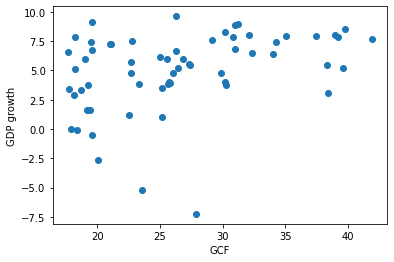

In [18]:
plt.xlabel("GCF")
plt.ylabel("GDP growth")
plt.scatter(GCF, GDP_growth)
plt.show()

In [22]:
GDP_growth = np.array(GDP_growth)
GCF = np.array(GCF)

SPLITTING DATASET INTO TRAIN AND TEST DATASETS

In [27]:
from sklearn.model_selection import train_test_split
GCF_train, GCF_test, GDP_growth_train, GDP_growth_test = train_test_split(GCF, GDP_growth, train_size=0.7, random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(GCF.reshape(-1, 1), GDP_growth)

LinearRegression()

In [33]:
sec_regressor = LinearRegression()
sec_regressor.fit(GCF_train.reshape(-1,1), GDP_growth_train)

LinearRegression()

In [34]:
GDP_growth_pred = sec_regressor.predict(GCF_test.reshape(-1,1))

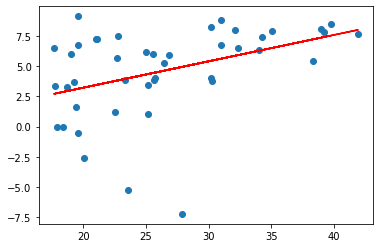

In [41]:
plt.scatter(GCF_train, GDP_growth_train)
plt.plot(GCF_train, sec_regressor.predict(GCF_train.reshape(-1,1)), color='red')
plt.show()

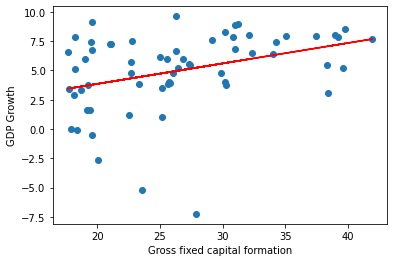

In [100]:
plt.scatter(GCF, GDP_growth)
plt.plot(GCF, regressor.predict(GCF.reshape(-1,1)), color='red')
plt.xlabel("Gross fixed capital formation")
plt.ylabel("GDP Growth")
plt.show()

In [64]:
con_data = pd.read_csv("consumptiongrowth.csv")
con_data

,Year,Consumption Growth(annual %)
0,1960,NaN
1,1961,2.068121
2,1962,2.555346
3,1963,5.179191
4,1964,5.840048
...,...,...
57,2017,7.081570
58,2018,7.029139
59,2019,4.938809
60,2020,-4.542697


In [76]:
consumption_growth = con_data["Consumption Growth(annual %)"]
consumption_growth = consumption_growth.iloc[1:(len(consumption_growth))]
len(consumption_growth)

61

In [77]:
consumption_growth

1     2.068121
2     2.555346
3     5.179191
4     5.840048
5     0.931947
        ...   
57    7.081570
58    7.029139
59    4.938809
60   -4.542697
61    7.163663
Name: Consumption Growth(annual %), Length: 61, dtype: float64

In [78]:
consumption_growth = np.array(consumption_growth)

In [94]:
GDP_growth_nx = data["GDP growth (annual %)"]

In [95]:
GDP_growth_nx = GDP_growth_nx.iloc[1:(len(GDP_growth_nx))]
GDP_growth_nx = np.array(GDP_growth_nx)

In [96]:
len(GDP_growth_nx)

61

In [97]:
consumption_regressor = LinearRegression()
consumption_regressor.fit(consumption_growth.reshape(-1,1), GDP_growth_nx)

LinearRegression()

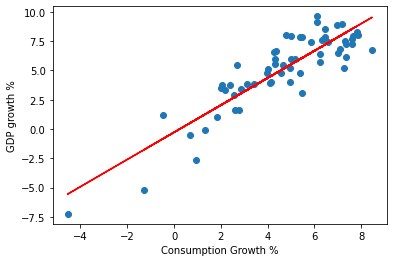

In [102]:
plt.scatter(consumption_growth, GDP_growth_nx)
plt.plot(consumption_growth, consumption_regressor.predict(consumption_growth.reshape(-1,1)), color='red')
plt.xlabel("Consumption Growth %")
plt.ylabel("GDP growth %")
plt.show()

In [106]:
print(consumption_regressor.predict([[7.1]]))

[7.94916372]


In [110]:
print(regressor.predict([[45]]))

[8.21366261]
